Once deleted, variables cannot be recovered. Proceed (y/[n])? y
PSD: 500
Bandwidth: 100
Sampling frequency: 200
Length of the sequence: 100
Power= 100000.0
Calculated PSD:  (499.46187337040817+0j)
Input PSD:  500.0
AWGN of given length : [[ 474.27231299 -102.71144098  206.41602584  295.93475357  -57.56946914
  -284.37413772  359.50578725 -272.78306683 -101.43607099  296.9103202
  -190.92271819   52.47833878 -103.12685551 -222.17044327  388.01102698
     1.19740671 -246.67713882 -189.16939656 -106.94196682 -134.6079725
  -220.66571231  358.05894867 -201.08628117  436.3774626  -374.54598107
  -103.15282192 -338.18352873    2.3579093   420.32282578 -940.5910305
   265.60592952   63.93422892  -22.22302484 -121.92332985   41.25498552
   107.88759257 -234.12690491 -142.98979893  196.95109315 -175.24288269
    66.2073544  -187.37794799  354.42967998  861.37142892  -90.41796561
    43.6056075  -318.63217803   37.04632745   10.45486499  335.95407938
   312.55754703 -248.53108804  296.4153649  -

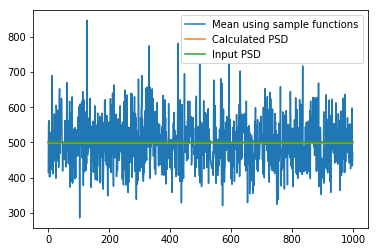

In [11]:
%reset
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

def myawgn(psd,bandwidth,fs,l):
    exp_x_sq=psd*2*bandwidth;
    print('Power=',exp_x_sq)
    std_dev=np.sqrt(exp_x_sq);
    arr=[];
    arr=np.random.randn(1,l)*std_dev;
    
    
    #Verifying PSD
    N=1000 #Number of sample functions
        
    #Producing N sample functions with the same length, mean, variance to verify PSD
    ans=np.random.randn(N,l)*std_dev;

    # Fourier transform of each sample function
    ans_fourier=[0 for i in range(N)]   
    for n1 in range(N):
        ans_fourier[n1]=np.fft.fft(ans[n1]);

    #Taking Complex conjugate and multiplying with original and taking mean to give E[|X_t(w)|^2]
    ans_mean=[0 for i in range(N)]
    for n1 in range(N):
        ans_mean[n1]=np.mean(ans_fourier[n1]*np.conj(ans_fourier[n1]))/(l*fs);
        
    #Plotting the values obtained from each sample function and the final calculated PSD 
    x=range(N)
    y_calc=[np.mean(ans_mean) for i in range(N)]
    psd_input=[psd for i in range(N)]
    print('Calculated PSD: ',np.mean(ans_mean))
    print('Input PSD: ',psd)
    plt.plot(ans_mean,label='Mean using sample functions')
    plt.plot(x,y_calc,label='Calculated PSD')
    plt.plot(x,psd_input,label='Input PSD')
    plt.legend()
    return arr;

psd=float(input('PSD: '))
bandwidth=float(input('Bandwidth: '))
fs=float(input('Sampling frequency: '))
l=int(input('Length of the sequence: '))
awgn=myawgn(psd,bandwidth,fs,l)
print('AWGN of given length :',awgn);


        

In [25]:
%reset
from matplotlib import pyplot as plt
import numpy as np
import math
import random  
from datetime import datetime
import statistics as st
import sympy as sym
import scipy.linalg as la
np.set_printoptions(2);
random.seed(datetime.now())

def diag(mat):
    eigva,P = la.eig(mat);    
    P = np.array(P).astype(float);
    P_inv = np.linalg.inv(P);
    D = np.matmul(P_inv,mat);
    D = np.matmul(D,P);
    return D,P;

def func(mean,cov,s):
    D,P = diag(cov);
    P = np.array(P).astype(float);
    D = np.array(D).astype(float);
    P_inv = np.linalg.inv(P);
    
    for i in range(0,len(D)):
        D[i][i] = np.sqrt(D[i][i]);
    
    M = np.matmul(P,D);
    M = np.matmul(M,P_inv);
    
    ans = np.matmul(np.random.randn(s, len(D)),M);
    
    for i in range(0,s):
        ans[i] = ans[i] + mean;
    print(ans);
    
    print('\nMean of samples generated, for Verification:\n');
    mean = [];
    ans = np.transpose(ans);
    for i in range(0,len(D)):  #to verify Means
        mean.append(np.mean(ans[i]));
    print(mean);
    print('\nCovariance of sample generated, for verification:\n');
    print(np.cov(ans));       #To verify covariance
    
COV = np.array([[5 ,  7  , 6  , 5],
                [7 ,  10 , 8  , 7],
                [6 ,  8 , 10 , 9],
                [5 ,  7  , 9 , 10]]);
MEAN = np.array([1,2,3,-1]);
func(MEAN,COV,10000);

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
[[-1.36 -0.99 -2.85 -7.44]
 [ 4.82  7.26  6.43  1.42]
 [ 3.69  5.58  7.79  4.98]
 ...
 [ 0.19  0.32  1.76 -2.35]
 [-1.06 -1.09  2.44 -0.72]
 [-3.26 -3.79 -0.78 -2.86]]

Mean of samples generated, for Verification:

[0.9933469633154027, 1.9925272643433698, 2.9855272170854525, -1.0161711130907343]

Covariance of sample generated, for verification:

[[4.96 6.96 5.88 4.89]
 [6.96 9.96 7.85 6.86]
 [5.88 7.85 9.75 8.77]
 [4.89 6.86 8.77 9.79]]
